<a href="https://colab.research.google.com/github/asthaasati/House_Price_Prediction_Streamlit/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [9]:
url = "/content/train.csv"
df = pd.read_csv(url)

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
print(df.shape)

(1460, 81)


In [12]:
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [13]:
missing_threshold = 0.4
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > missing_threshold].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)

In [14]:
num_cols_to_impute = ['GarageYrBlt', 'LotFrontage','MasVnrArea']
num_imputer = SimpleImputer(strategy='mean')
df[num_cols_to_impute] = num_imputer.fit_transform(df[num_cols_to_impute])

In [15]:
cat_imputer = SimpleImputer(strategy='most_frequent')
df[['BsmtQual']] = cat_imputer.fit_transform(df[['BsmtQual']])

In [16]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [17]:
qual_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
            'HeatingQC', 'KitchenQual', 'FireplaceQu',
            'GarageQual', 'GarageCond']
for col in ord_cols:
    if col in df.columns:
        df[col] = df[col].map(qual_dict)

In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [19]:
X_all = df_encoded.drop('SalePrice', axis=1)
y_all = df_encoded['SalePrice']
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_all, y_all)

RandomForestRegressor(random_state=42)

In [20]:
importances = pd.DataFrame({
    'Feature': X_all.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
top_features = importances.head(30)['Feature'].tolist()

In [21]:
X = df_encoded[top_features]
y = df_encoded['SalePrice']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [24]:
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.8397


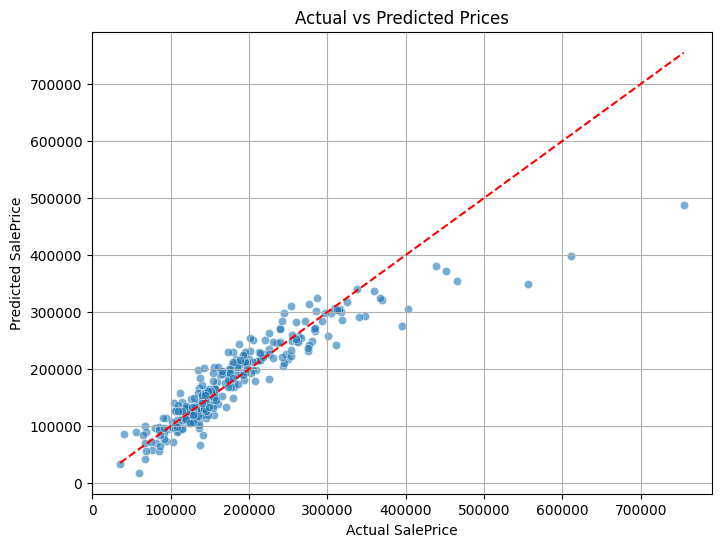

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)
plt.show()

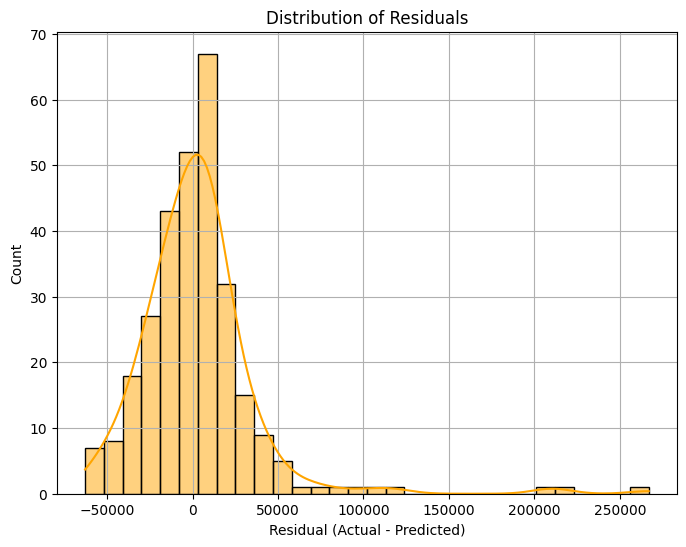

In [26]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True, color='orange')
plt.title('Distribution of Residuals')
plt.xlabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.show()

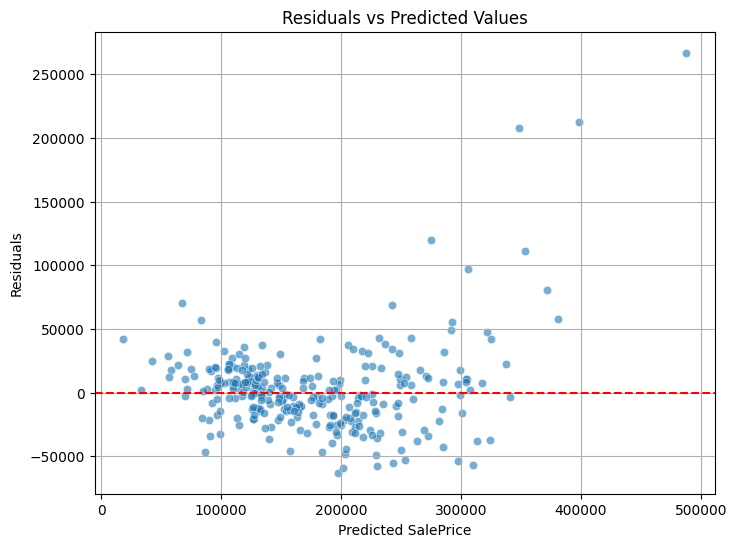

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

In [28]:
import joblib
joblib.dump(lr, 'house_price_model.pkl')
joblib.dump(top_features, 'top_features.pkl')


['top_features.pkl']

In [34]:

files.download('house_price_model.pkl')
files.download('top_features.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>